In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import gmaps
from config import ykey, gkey

Cities from article '10 best foodie cities in America' on CNBC.
https://www.cnbc.com/2018/11/05/wallethub-best-food-cities-in-america.html

In [2]:
# List of cities

cities = ['Portland, OR', 'San Francisco, CA', 'Miami, FL', 'New York, NY', 'Los Angeles, CA', 
          'Orlando, FL', 'Las Vegas, NV', 'Seattle, WA', 'San Diego, CA', 'Austin, TX']

In [3]:
# Get data from Yelp

yelp_url = 'https://api.yelp.com/v3/businesses/search'
yelp_headers = {'Authorization': 'Bearer %s' % ykey}

# Columns for DataFrame

name_list = []
city_list = []
state_list = []
category_list = []
rating_list = []
review_count_list = []
price_list = []

for city in cities:
    yelp_params = {'location' : city, 'term': 'food', 'limit' : '50', 'sortby' : 'rating, review_count'}
    yelp_response = requests.get(yelp_url, yelp_params, headers = yelp_headers)
    yelp_data = yelp_response.json()
    restaurant_data = yelp_data['businesses']
    print(f'Retrieving restaurants in {city}')

    for restaurant in restaurant_data:
        
        for category in restaurant['categories']:
            
            name_list.append(restaurant['name'])
            city_list.append(restaurant['location']['city'])
            state_list.append(restaurant['location']['state'])
            category_list.append(category['title'])
            rating_list.append(restaurant['rating'])
            review_count_list.append(restaurant['review_count'])
            
            try:                
                price_list.append(restaurant['price'])
            
            except:
                price_list.append('')     

Retrieving restaurants in Portland, OR
Retrieving restaurants in San Francisco, CA
Retrieving restaurants in Miami, FL
Retrieving restaurants in New York, NY
Retrieving restaurants in Los Angeles, CA
Retrieving restaurants in Orlando, FL
Retrieving restaurants in Las Vegas, NV
Retrieving restaurants in Seattle, WA
Retrieving restaurants in San Diego, CA
Retrieving restaurants in Austin, TX


In [4]:
# Create DataFrame for all city restaurants

restaurants_pd = pd.DataFrame({'Name' : name_list, 'City' : city_list, 'State' : state_list, 'Category' : category_list, 
                               'Rating' : rating_list, 'Review Count' : review_count_list, 'Price' : price_list})

restaurants_pd.head()

,Name,City,State,Category,Rating,Review Count,Price
0,Screen Door,Portland,OR,Southern,4.5,6371,$$
1,Screen Door,Portland,OR,Cajun/Creole,4.5,6371,$$
2,Screen Door,Portland,OR,Breakfast & Brunch,4.5,6371,$$
3,Bao Bao,Portland,OR,Food Stands,4.5,92,$
4,Bao Bao,Portland,OR,Dim Sum,4.5,92,$


In [5]:
# Cleanup DataFrame by replacing/combining values and removing categories that don't reflect foot type

restaurants_pd = restaurants_pd[restaurants_pd.Price != '']
restaurants_pd['Price'].replace({'$$$$$' : 5, '$$$$' : 4, '$$$' : 3, '$$' : 2, '$' : 1}, inplace = True)
restaurants_pd['Price'] = pd.to_numeric(restaurants_pd['Price'])

restaurants_pd['Category'].replace(['American (New)', 'American (Traditional)'], 'American', inplace = True)
restaurants_pd['Category'].replace(['Beer Bar', 'Beer, Wine & Spirits', 'Brewpubs', 'Cocktail Bars', 
                                    'Wine Bars', 'Beer Gardens', 'Pubs', 'Gastropubs', 
                                    'Izakaya', 'Sports Bars'], 'Bars', inplace = True)
restaurants_pd['Category'].replace(['Coffee & Tea', 'Bubble Tea', 'Hong Kong Style Cafe'], 'Cafes', inplace = True)
restaurants_pd['Category'].replace(['Cupcakes', 'Custom Cakes', 'Patisserie/Cake Shop'], 'Desserts', inplace = True)
restaurants_pd['Category'].replace(['Seafood Markets'], 'Seafood', inplace = True)
restaurants_pd['Category'].replace(['Smokehouse'], 'Barbeque', inplace = True)
restaurants_pd['Category'].replace(['Empanadas'], 'Latin American', inplace = True)
restaurants_pd['Category'].replace(['Japanese Curry'], 'Japanese', inplace = True)
restaurants_pd['Category'].replace(['New Mexican Cuisine'], 'Mexican', inplace = True)
restaurants_pd['Category'].replace(['Cheesesteaks'], 'Sandwiches', inplace = True)
restaurants_pd['Category'].replace(['Tapas Bars'], 'Tapas/Small Plates', inplace = True)
restaurants_pd['Category'].replace(['Chicken Wings'], 'Chicken Shop', inplace = True)
restaurants_pd['Category'].replace(['Southern'], 'Soul Food', inplace = True)
restaurants_pd['Category'].replace(['Tacos'], 'Mexican', inplace = True)
restaurants_pd['Category'].replace(['Pasta Shops'], 'Italian', inplace = True)
restaurants_pd['Category'].replace(['Sushi Bars', 'Ramen'], 'Japanese', inplace = True)

restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Bookstores']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Home Decor']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Music Venues']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Lounges']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Food']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Caterers']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Cheese Shops']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Tabletop Games']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Street Vendors']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Food Trucks']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Food Stands']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Food Court']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Popcorn Shops']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Venues & Event Spaces']
restaurants_pd = restaurants_pd[restaurants_pd.Category != 'Flea Markets']

restaurants_pd = restaurants_pd.loc[(restaurants_pd['City'] == 'Portland') | 
                                    (restaurants_pd['City'] == 'San Francisco') |
                                    (restaurants_pd['City'] == 'Miami') | 
                                    (restaurants_pd['City'] == 'New York') |
                                    (restaurants_pd['City'] == 'Los Angeles') | 
                                    (restaurants_pd['City'] == 'Orlando') |
                                    (restaurants_pd['City'] == 'Las Vegas') | 
                                    (restaurants_pd['City'] == 'Seattle') |
                                    (restaurants_pd['City'] == 'San Diego') | 
                                    (restaurants_pd['City'] == 'Austin')]

restaurants_pd.drop_duplicates(keep = False, inplace = True)

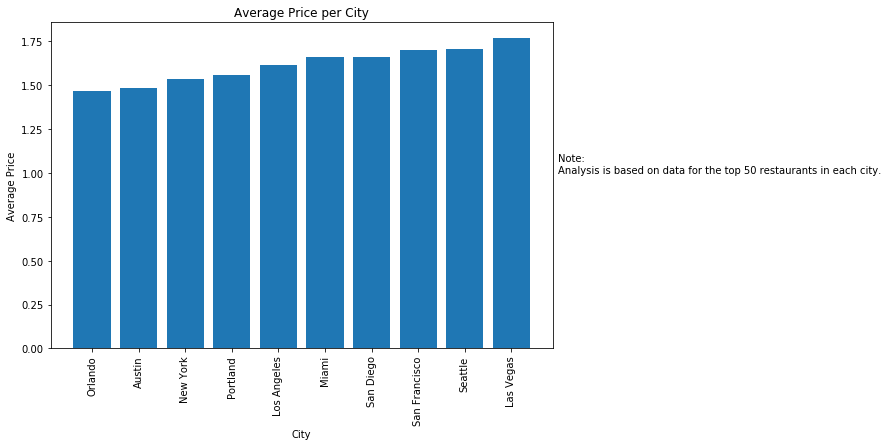

In [6]:
avg_price = restaurants_pd.groupby('City')['Price'].mean()
avg_price = avg_price.sort_values()

plt.figure(figsize = (9, 6))
plt.bar(avg_price.keys(), avg_price)
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price per City')
plt.xticks(rotation=90)
plt.text(10, 1, 'Note:\nAnalysis is based on data for the top 50 restaurants in each city.')
plt.show()

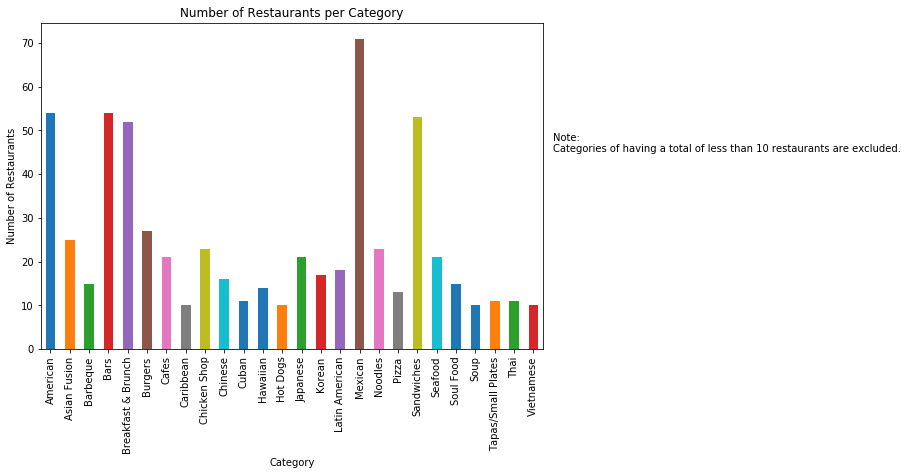

In [9]:
grouped_df = restaurants_pd.groupby('Category').filter(lambda x: x['Name'].count() >= 10)
top_cat_df = grouped_df.groupby('Category')['Name'].count()

plt.figure(figsize = (9, 6))
top_cat_plot = top_cat_df.plot(kind = 'bar')
top_cat_plot.set_ylabel("Number of Restaurants")
top_cat_plot.set_title("Number of Restaurants per Category")
top_cat_plot.text(26, 45, 'Note:\nCategories of having a total of less than 10 restaurants are excluded.')
plt.show()

In [10]:
# DataFrames for restaurants in each city

portland_pd = restaurants_pd[restaurants_pd.City == 'Portland']
sanfrancisco_pd = restaurants_pd[restaurants_pd.City == 'San Francisco']
miami_pd = restaurants_pd[restaurants_pd.City == 'Miami']
newyork_pd = restaurants_pd[restaurants_pd.City == 'New York']
losangeles_pd = restaurants_pd[restaurants_pd.City == 'Los Angeles']
orlando_pd = restaurants_pd[restaurants_pd.City == 'Orlando']
lasvegas_pd = restaurants_pd[restaurants_pd.City == 'Las Vegas']
seattle_pd = restaurants_pd[restaurants_pd.City == 'Seattle']
sandiego_pd = restaurants_pd[restaurants_pd.City == 'San Diego']
austin_pd = restaurants_pd[restaurants_pd.City == 'Austin']

In [11]:
# Function to calculate average price per category for a DataFrame

def avg_price_category (city_pd):
    result_pd = city_pd.groupby('Category').filter(lambda x: x['Name'].count() >= 3)
    return result_pd.groupby('Category')['Price'].mean()

In [12]:
# Create list to hold mean data for each city
data_list = []

data_list.append(avg_price_category(portland_pd))
data_list.append(avg_price_category(sanfrancisco_pd))
data_list.append(avg_price_category(miami_pd))
data_list.append(avg_price_category(newyork_pd))
data_list.append(avg_price_category(losangeles_pd))
data_list.append(avg_price_category(orlando_pd))
data_list.append(avg_price_category(lasvegas_pd))
data_list.append(avg_price_category(seattle_pd))
data_list.append(avg_price_category(sandiego_pd))
data_list.append(avg_price_category(austin_pd))

city_mean_pd = pd.DataFrame({'City' : cities, 'Data': data_list})

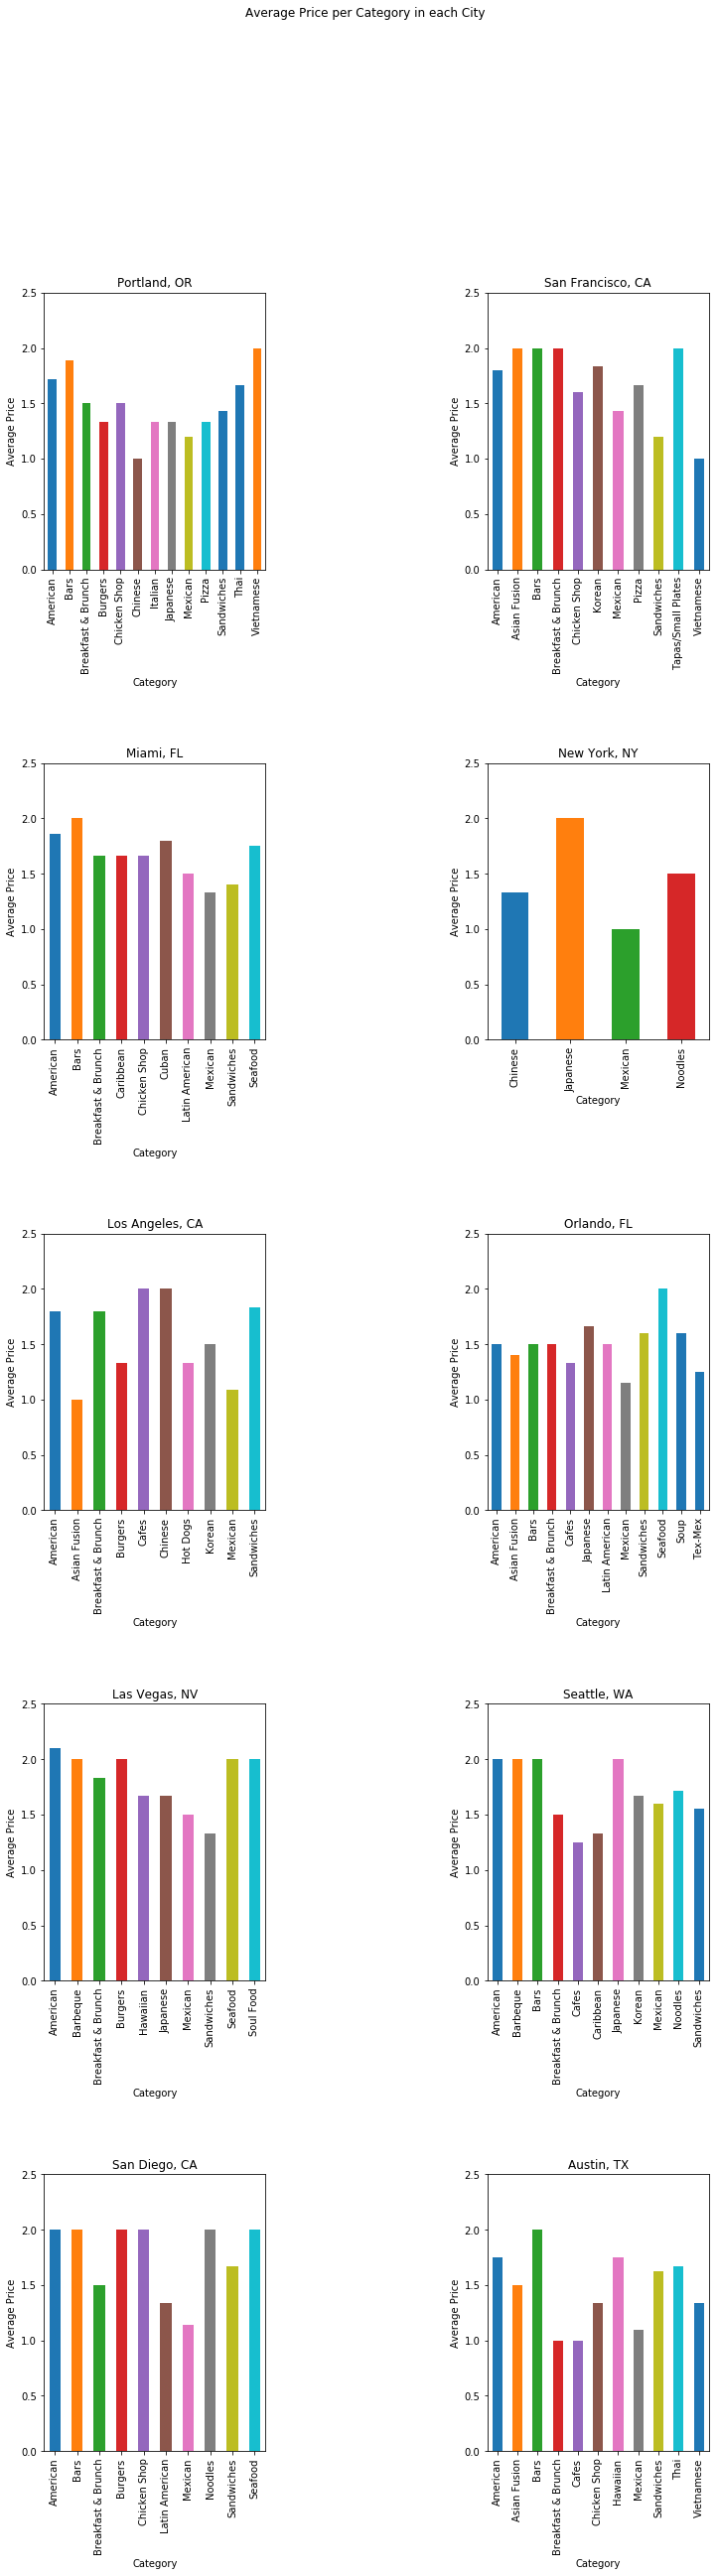

In [13]:
fig = plt.figure(figsize = (12, 40))
fig.subplots_adjust(hspace = 0.7)
fig.subplots_adjust(wspace = 1)


for i in range(1,11):
    city_name = city_mean_pd['City']
    ax = plt.subplot(5, 2, i)
    city_mean_pd['Data'][i-1].plot(kind = 'bar')
    ax.title.set_text(city_name[i-1])
    plt.ylabel('Average Price')
    plt.ylim(0, 2.5)

fig.suptitle('Average Price per Category in each City')

plt.show()

In [14]:
# Function to extract top 5 restaurants from a given DataFrame

def extract_top(city_df):
    city_top_df = city_df[['Name', 'Rating', 'Review Count', 'Price']]
    city_top_df = city_top_df.drop_duplicates()
    city_top_df.sort_values(['Review Count', 'Rating'], ascending = [0, 0], inplace = True, )
    city_top_df = city_top_df.head()
    
    return city_top_df

In [15]:
# DataFrames for top 5 restaurants in each city

portland_top = extract_top(portland_pd)
sanfrancisco_top = extract_top(sanfrancisco_pd)
miami_top = extract_top(miami_pd)
sanfrancisco_top = extract_top(sanfrancisco_pd)
newyork_top = extract_top(newyork_pd)
losangeles_top = extract_top(losangeles_pd)
orlando_top = extract_top(orlando_pd)
lasvegas_top = extract_top(lasvegas_pd)
seattle_top = extract_top(seattle_pd)
sandiego_top = extract_top(sandiego_pd)
austin_top = extract_top(austin_pd)

# Put them in a list

cities_top = [portland_top, sanfrancisco_top, miami_top, newyork_top, losangeles_top, orlando_top, lasvegas_top, 
             seattle_top, sandiego_top, austin_top]

portland_top

,Name,Rating,Review Count,Price
0,Screen Door,4.5,6371,2
42,Pok Pok,4.0,5776,2
26,Mother’s Bistro & Bar,4.5,3952,2
8,Tasty n Alder,4.5,3465,2
11,Pine State Biscuits,4.5,3297,1


In [16]:
# Function to generate formated restaurant info for info_box_content in gmaps

def info_box_text(city_top_df):
    
    mid_str = ''
    
    for index, row in city_top_df.iterrows():
        name = row['Name']
        rating = row['Rating']
        mid = f'{name} | {rating}&#9733;<br>'
        mid_str = mid_str + mid
    
    info_text = '\n<dl>\n<dt>Restaurants</dt><dd>' + mid_str + '</dd>\n</dl>'
    
    return [info_text]

In [17]:
# Format restaurant info for top 5 restaurants in each city

city_info_text = []

for city in cities_top:
    city_info_text.append(info_box_text(city))

In [18]:
# Generate coordinates for each city

city_coordinates = []

for city in cities:

    geocode_params = {"address": city, "key": gkey}
    geocode_base_url = (f'https://maps.googleapis.com/maps/api/geocode/json')

    geocode_response = requests.get(geocode_base_url, params = geocode_params).json()

    city_coordinates.append([(round(geocode_response["results"][0]["geometry"]["location"]["lat"], 2), 
                             round(geocode_response["results"][0]["geometry"]["location"]["lng"], 2))])

In [20]:
# DataFrame to hold gmaps data

gmaps_pd = pd.DataFrame({'City': cities, 'Coordinates': city_coordinates, 'Info_Box_Text' : city_info_text})

In [21]:
# Generate map with markers for each city and restaurant info

gmaps.configure(api_key=gkey)

fig = gmaps.figure()

for index, row in gmaps_pd.iterrows():
    info_text = row['Info_Box_Text']
    coordinates = row['Coordinates']
    
    marker_layer_city = gmaps.marker_layer(coordinates, info_box_content = info_text)
    
    fig.add_layer(marker_layer_city)

fig

Figure(layout=FigureLayout(height='420px'))